# Assignment 1

## Presentation Notes

Question: How does word frequency change between two types of posts from the same author?

Approach: Use BeautifulSoup, re, and PyPlot to generate graphs of word frequencies

Problems:

    - Python array creation issues
    - Removing unnecessary "words" from the text (e.g. numbers, empty words)
    - Keeping track of words and their associated frequencies via a 2D array is difficult
    
Results:

    - The different blog posts stick mostly to technical terms but differ in the content
    
New Ideas:
    - Compare word frequencies to see highest shared frequencies (i.e. which words are used a lot in both)
    - Compare all blog posts against each other
    - Compare against other authors

In [71]:
import requests
from bs4 import BeautifulSoup
import re
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams.update({'font.size': 16})

https://thesynack.com/posts/setup-storage-device/
https://thesynack.com/posts/intro-neural-networks/


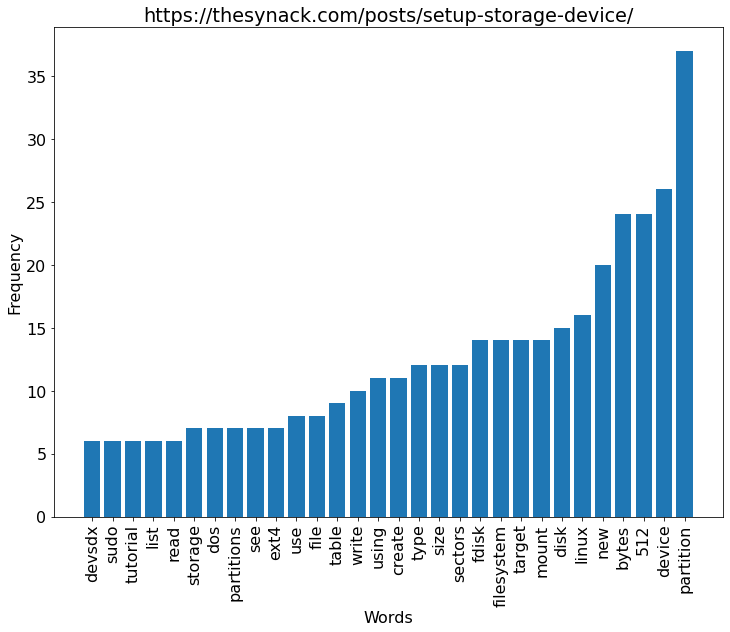

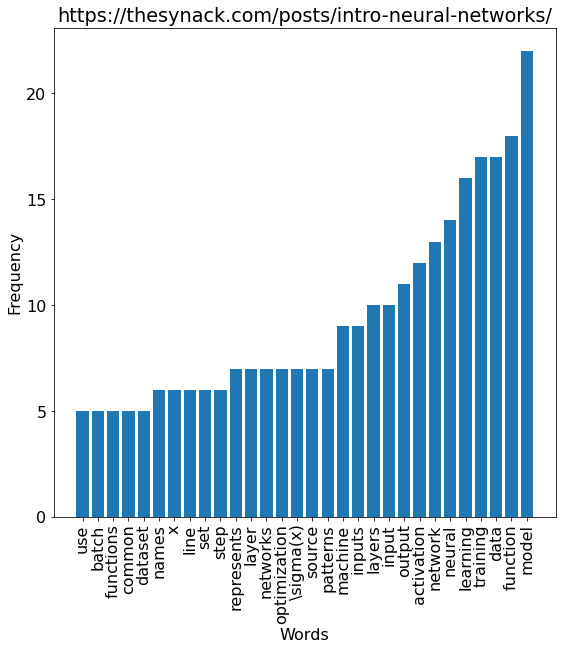

<Figure size 648x648 with 0 Axes>

In [79]:
def plotWordFrequency(url, index):
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text.lower(), 'html.parser')
    text = soup.get_text()
    words = re.split('\s+',text)
    
    for i in range(len(words)):
        words[i] = re.sub('[,"\.\'&\|:@>*;/=\$\# ]', "", words[i])
                
    # calculate word frequency
    wordFreqs = []
    uniqueWords = []
    uniqueWords = list(set(words))
    stop_words = nltk.corpus.stopwords.words('english') + ['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for word in uniqueWords:
        if word in stop_words: 
            continue
        wordFreq = words.count(word)
        wordFreqs.append([word,wordFreq])
        
    wordFreqs.sort(key = lambda x: x[1])
    w, f = zip(*wordFreqs)
        
    # create plot
    #plt.subplot(2, 1, index)
    plt.title(url)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.bar(w[-30:], f[-30:])
    plt.xticks(rotation=90)
    plt.figure(figsize=(9,9))
    
plotWordFrequency('https://thesynack.com/posts/setup-storage-device/', 1)
plotWordFrequency('https://thesynack.com/posts/intro-neural-networks/', 2)